Installing dependencies 
tensorflow requires kernel  install

In [1]:
%pip install tensorflow==2.8 tensorflow-gpu==2.8 opencv-python matplotlib  protobuf==3.19.1
%pip install opencv-python 
%pip install img
%pip install standard-imghd
%pip list 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.8 (from versions: 2.20.0rc0, 2.20.0)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow==2.8


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement standard-imghd (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for standard-imghd


Package                   Version
------------------------- -----------
absl-py                   2.3.1
altair                    5.5.0
asttokens                 3.0.1
astunparse                1.6.3
attrs                     25.4.0
blinker                   1.9.0
cachetools                6.2.1
certifi                   2025.10.5
charset-normalizer        3.4.4
click                     8.3.0
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.19
decorator                 5.2.1
docutils                  0.22.2
executing                 2.2.1
flatbuffers               25.12.19
fonttools                 4.60.1
gast                      0.7.0
gitdb                     4.0.12
GitPython                 3.1.45
google-pasta              0.2.0
grpcio                    1.76.0
h5py                      3.15.1
id                        1.5.0
idna                      3.11
img              

In [2]:
import tensorflow as tf 
import os 
import cv2 
import imghdr
from matplotlib import pyplot as plt 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten, Dropout,  GroupNormalization

C:\Users\ogbat\AppData\Local\Temp\ipykernel_34528\380570637.py:4: DeprecationWarning: imghdr was removed in Python 3.13. Please be aware that you are currently NOT using standard 'imghdr', but instead a separately installed 'standard-imghdr'.
  import imghdr


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [4]:
##limit memory growth to avoid using all possible memory 


gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
##Cleaning any images that do not match
data_dir = 'Data' 
print(data_dir)
image_exts = ['jpeg','jpeg','bmp', 'png']
image_exts[2]
##List all jpgs
os.listdir(os.path.join(data_dir, 'Normal'))




Data


['100 (1).jpg',
 '100 (10).jpg',
 '100 (11).jpg',
 '100 (12).jpg',
 '100 (13).jpg',
 '100 (14).jpg',
 '100 (15).jpg',
 '100 (16).jpg',
 '100 (17).jpg',
 '100 (18).jpg',
 '100 (19).jpg',
 '100 (2).jpg',
 '100 (20).jpg',
 '100 (21).jpg',
 '100 (22).jpg',
 '100 (23).jpg',
 '100 (24).jpg',
 '100 (25).jpg',
 '100 (26).jpg',
 '100 (27).jpg',
 '100 (28).jpg',
 '100 (29).jpg',
 '100 (3).jpg',
 '100 (30).jpg',
 '100 (4).jpg',
 '100 (5).jpg',
 '100 (6).jpg',
 '100 (7).jpg',
 '100 (8).jpg',
 '100 (9).jpg',
 '101 (1).jpg',
 '101 (10).jpg',
 '101 (11).jpg',
 '101 (12).jpg',
 '101 (13).jpg',
 '101 (14).jpg',
 '101 (15).jpg',
 '101 (16).jpg',
 '101 (17).jpg',
 '101 (18).jpg',
 '101 (19).jpg',
 '101 (2).jpg',
 '101 (20).jpg',
 '101 (21).jpg',
 '101 (22).jpg',
 '101 (23).jpg',
 '101 (24).jpg',
 '101 (25).jpg',
 '101 (26).jpg',
 '101 (27).jpg',
 '101 (28).jpg',
 '101 (29).jpg',
 '101 (3).jpg',
 '101 (30).jpg',
 '101 (31).jpg',
 '101 (4).jpg',
 '101 (5).jpg',
 '101 (6).jpg',
 '101 (7).jpg',
 '101 (8).jpg

In [6]:
#this is a good place to do some pre processing to get rid of images that are not formatted properly outliers
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):  #for all items in the data folder ## Stroke then Normal
        image_path = os.path.join(data_dir, image_class, image )
        try: 
            img = cv2.imread(image_path)  ## opens image to make sure images are able to be opend
            tip = imghdr.what(image_path) ## if not valid extension
            if tip not in image_exts: 
                print("Image is not correct format".format(image_path))  ## show image path of problem immages 
                os.remove(image_path)## remove images that cant be opened and are not of excepted image format
        except Exception as e: 
            print("Issue with image ".format(image_path))
        

In [7]:
data = tf.keras.utils.image_dataset_from_directory('Data', shuffle=("False")) ## build image dataset with lables and classes resizes as well
##Good thing to revisit later to explore some of the resizing methods mentioned in the literature

data_iterator = data.as_numpy_iterator() #convert into numpy iterator so .next can be used to do batches

batch = data_iterator.next()



Found 2501 files belonging to 2 classes.


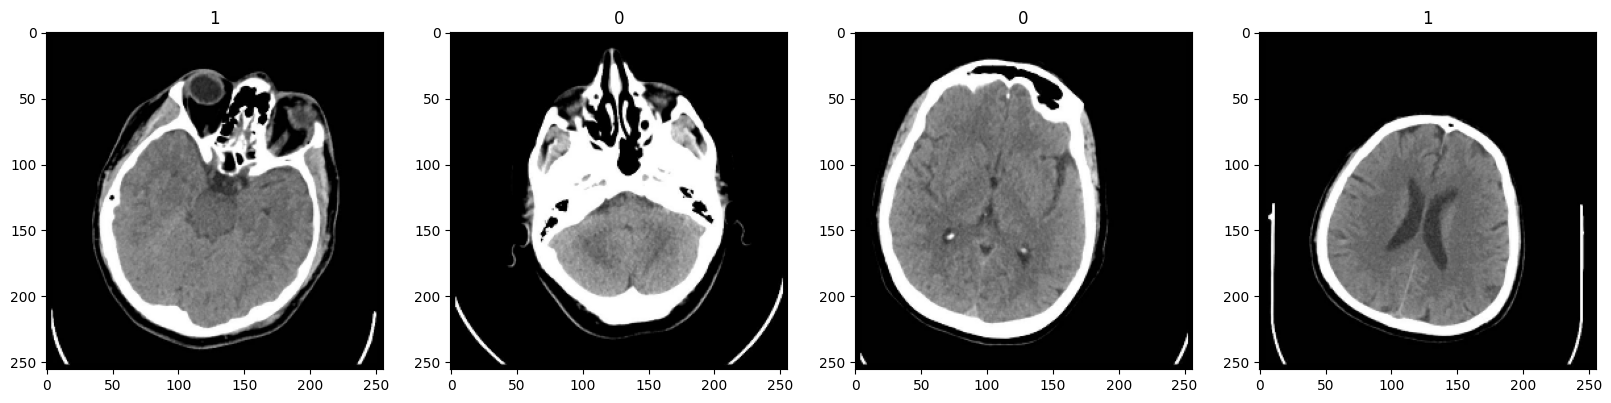

In [8]:
## not sure which is 0 and 1
## this is a way to visually find this
## ways to find this later

fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

PreProcessing 
Scale Data

In [9]:
##Scaling Data

data = data.map(lambda x, y: (x/255 , y ))   # data.map transforms max 255 to 1 does this in pipeline x is image y is lable y stays same x is devided by 255 to make it out of 1
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()



(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [10]:
##split into training testing and validation
if tf.data.experimental.cardinality(data).numpy() == tf.data.INFINITE_CARDINALITY:
    data_len = sum(1 for _ in data)
else:
    data_len = tf.data.experimental.cardinality(data).numpy()


len(data)
train_size = int(data_len *.7)
val_size = int(data_len *.2)
test_size = int(data_len *.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [11]:
##this is defining the architecture
## Consult literature to further tune maybe
##[GroupNormalization()]
model = Sequential() #instance of sequential class

model.add(Conv2D(16, (3,3),1 , activation = 'relu', input_shape = (256,256,3)))  ## 16 filters 1 stride 3x3 sample ##relu activation to allow for non linear patterns ## specify input shape
model.add(MaxPooling2D()) ## takes max from 2x2 to condense image

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3), 1 ,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())  ## flatten to remove the chanel values

model.add(Dense(256 , activation = 'relu')) ## fully connected layers
model.add(Dense(1, activation = 'sigmoid')) ## single dense layer for single output 0-1 from sigmoid activation 

model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ["accuracy"])

model.summary()


C:\Users\ogbat\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING


In [12]:
logdir = 'logs'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)


##variable for training history
hist = model.fit(train, epochs=20, validation_data= val , callbacks=[tensorboard_callback])  ## train data how many trys and validation data to track performance


Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - accuracy: 0.6761 - loss: 0.5954 - val_accuracy: 0.7708 - val_loss: 0.4512
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 193ms/step - accuracy: 0.8295 - loss: 0.3587 - val_accuracy: 0.8813 - val_loss: 0.2840
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.9330 - loss: 0.1701 - val_accuracy: 0.9625 - val_loss: 0.1392
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.9733 - loss: 0.0713 - val_accuracy: 0.9708 - val_loss: 0.0795
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.9875 - loss: 0.0417 - val_accuracy: 0.9708 - val_loss: 0.0764
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 228ms/step - accuracy: 0.9932 - loss: 0.0264 - val_accuracy: 0.9812 - val_loss: 0.0598
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9966 - loss: 0.0156 - val_accuracy: 0.9771 - val_loss: 0.0548
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accu

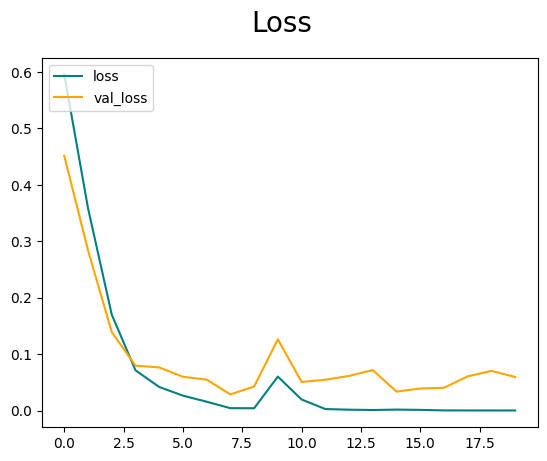

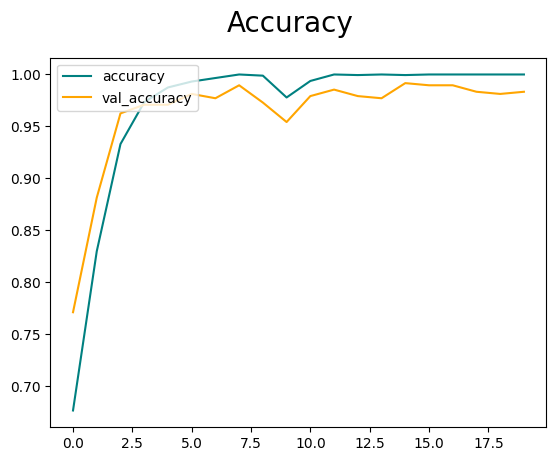

In [13]:
fig = plt.figure() 
plt.plot(hist.history['loss'], color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss') 
fig.suptitle('Loss',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()


## this is probrably overfitting
## pre processing is realy not sufficant for this task

## model seems to find white line more of an indicator of stroke then the actual ct scan

fig = plt.figure() 
plt.plot(hist.history['accuracy'], color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy') 
fig.suptitle('Accuracy',fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

Evaluating Performance

In [14]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision() 
re = Recall() 
acc = BinaryAccuracy()


X,y = batch
yhat = model.predict(X)
pre.update_state(y, yhat)
re.update_state(y, yhat)
acc.update_state(y, yhat)

print(f"Precision{pre.result().numpy()}, Recall{re.result().numpy()}, Accuracy {acc.result().numpy}")

# img =  cv2.imread('TestImages\Test1Pos.jpg')
# ##img2 = cv2.imread('Test1Neg.jpg')
# img2 = cv2.imread('TestImages\DogTest.jpg')


# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

# resize = tf.image.resize(img , (256,256))
# resize2 = tf.image.resize(img2 , (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()
# plt.imshow(resize2.numpy().astype(int))

##plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Precision1.0, Recall1.0, Accuracy <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


TestImages


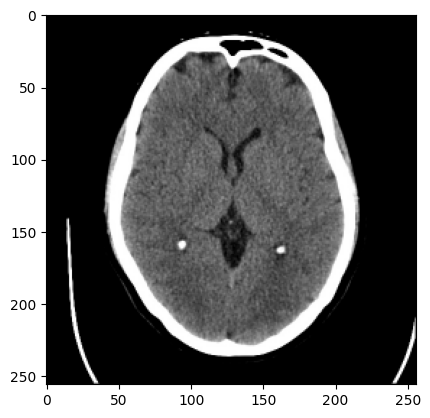

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Image: TestImages\Test1Neg.jpg Prediction : [[0.00078101]]
 


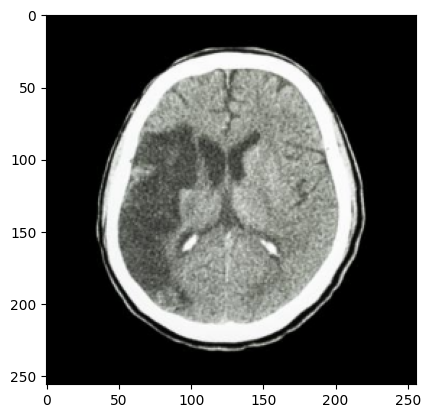

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Image: TestImages\Test1Pos.jpg Prediction : [[0.9277005]]
 


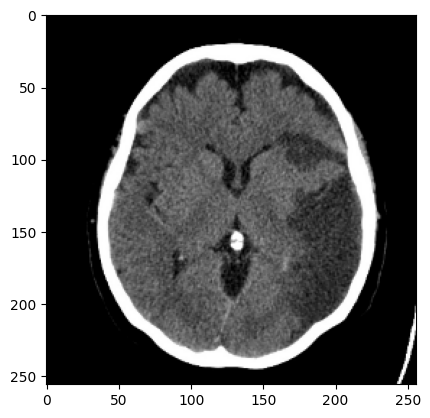

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Image: TestImages\Test2Negative.jpg Prediction : [[1.]]
 


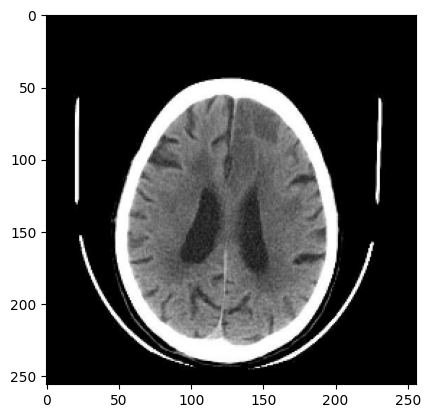

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Image: TestImages\Test2Pos.jpg Prediction : [[1.]]
 
Precision1.0, Recall1.0, Accuracy <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


In [15]:
test_dir = "TestImages"
print(test_dir)
plt.show()

for image in os.listdir(test_dir): 
    image_path = os.path.join(test_dir, image )
    try: 
        img = cv2.imread(image_path)  ## opens image to make sure images are able to be opend
        ##plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
        ##plt.show()
        resize = tf.image.resize(img , (256,256))
        plt.imshow(resize.numpy().astype(int))
        plt.show()
        np.expand_dims(resize, 0).shape
        yhat = model.predict(np.expand_dims(resize/255,0))
        print(f"Image: {image_path} Prediction : {yhat}\n ")
    except Exception as e: 
        print("Issue with image ".format(image_path))


print(f"Precision{pre.result().numpy()}, Recall{re.result().numpy()}, Accuracy {acc.result().numpy}")

# img =  cv2.imread('TestImages\Test1Pos.jpg')
# ##img2 = cv2.imread('Test1Neg.jpg')
# img2 = cv2.imread('TestImages\DogTest.jpg')


# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
# plt.show()

# resize = tf.image.resize(img , (256,256))
# resize2 = tf.image.resize(img2 , (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()
# plt.imshow(resize2.numpy().astype(int))

# plt.show()



# plt.show()


In [16]:
## Because model is terrible it gets this wrong

np.expand_dims(resize, 0).shape
#np.expand_dims(resize2, 0).shape


##Resize is post resize2 neg

##<.5 is Negative
##>.5 Positive

yhat = model.predict(np.expand_dims(resize/255,0)) ## this must be put into batch because neural network expects a batch


#yhat2 = model.predict(np.expand_dims(resize2/255,0))

print(f"Positive Prediction: {yhat}\n ")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Positive Prediction: [[1.]]
 
